In [16]:
from collections import Counter, namedtuple, OrderedDict
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import choice
import numpy as np
import string
import math
import heapq 
from scipy import stats

In [2]:
class Node(namedtuple('Node', ['left', 'right'])):
    def walk(self, code, acc):
        self.left.walk(code, acc + '0')
        self.right.walk(code, acc + '1')

In [3]:
class Leaf(namedtuple('leaf', ['char'])):
    def walk(self, code, acc):
        code[self.char] = acc or '0'

In [4]:
def huffman_encode(s):
    ch_list = list(Counter(s).items()) #одна итерация
    count = len(ch_list) #одна итерация
    h = [] #одна итерация
    iter_num =  3
    for i in range(count):
        h.append((ch_list[i][1], i, Leaf(ch_list[i][0]))) #одна итерация которая выполняется n раз, где n - количество уникальных элеменьов в строке
        iter_num += 1
    heapq.heapify(h) #одна итерация 
    iter_num +=1
    
    while len(h) > 1: #в этом цикле четыре итерации, которые выполняются n-1 раз, где n - количество уникальных элеменьов в строке
        freq1, _count1, left = heapq.heappop(h)
        freq2, _count2, right = heapq.heappop(h)
        heapq.heappush(h, (freq1 + freq2,count, Node(left, right)))
        count +=1
        iter_num +=4
    # Для оценки качества алгоритма можно не возвращать словать с кодами, поэтому просто вернем число итераций
    return iter_num

In [5]:
#Для построения гипотезы зафиксируем длину строки
n = 100
#Зафиксируем число экспериментов
m = 4000
iter_list = []

for k in tqdm(range(m)):
    x = ''.join(choice(string.printable) for i in range(n))
    iter_list.append(huffman_encode(x))

100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 8751.04it/s]


In [6]:
uniq = dict(Counter(iter_list))

In [7]:
x = list(uniq.keys())

In [8]:
#Нормируем (оно же относительная частота)
y = [Y/len(iter_list) for Y in list(uniq.values())]

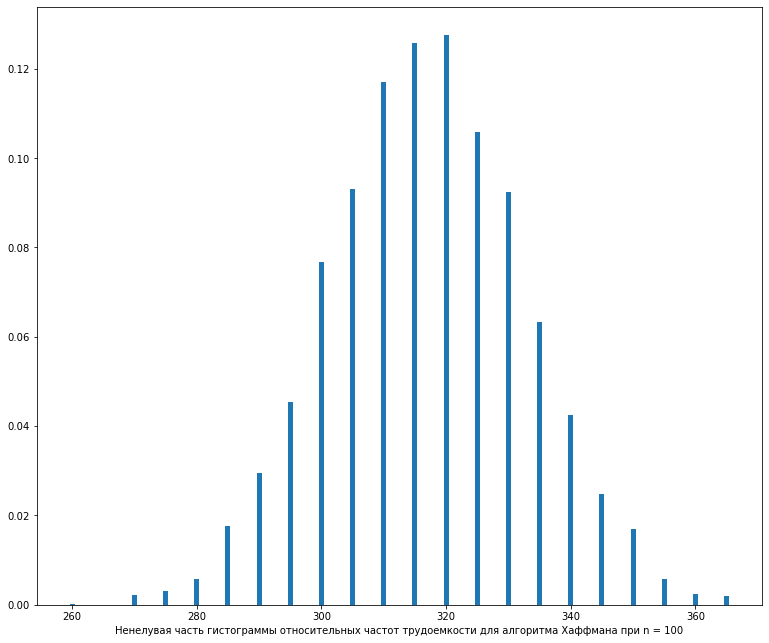

In [9]:
fig, ax = plt.subplots(figsize=(13,11))
ax.bar(x,y)
ax.set(xlabel = "Ненелувая часть гистограммы относительных частот трудоемкости для алгоритма Хаффмана при n = 100")
plt.show()

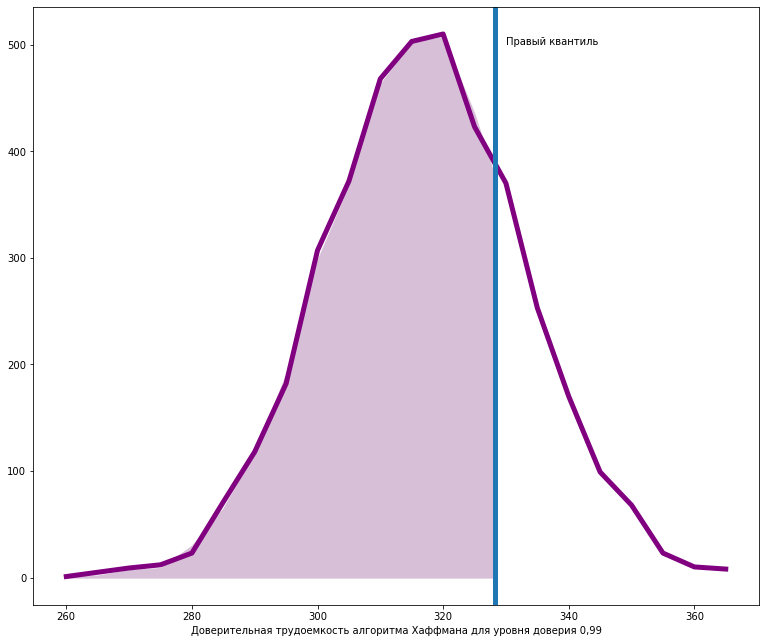

In [89]:
od = OrderedDict(sorted(uniq.items()))
xx = [260, 265, 270, 275,280,285,290,295,300,305,310,315,320,325,328.2379224]
yy = [ 1,2,7,9,30,65,117,191,298,367,463,502,507,435,376]
X = list(od.keys())
Y = list(od.values())
fig, ax = plt.subplots(figsize=(13,11))
ax.plot(X,Y, linewidth = 5, color = 'purple')
ax.fill_between(x = xx, y1=yy, color = 'thistle')
ax.axvline(x = 328.2379224, linewidth = 5)
ax.text(330, 500, 'Правый квантиль')
ax.set(xlabel = "Доверительная трудоемкость алгоритма Хаффмана для уровня доверия 0,99")
plt.show()